# Procedure for generating pictures in OhioT1DM Related Datasets and Additional Simulation Study

## Figure 2

[-26.22313857 -25.18989443 -25.56579218 -24.66604763]
[-27.34642649 -27.29965575 -25.95300148 -25.39936301]
[-37.44681028 -36.73106117 -36.12975413 -33.31682787]
[-68.14831982 -46.60591328 -40.21678372 -34.53023646]
[-27.1428929  -26.85097231 -25.72949961 -24.98704692]
[-28.11397735 -28.02266322 -27.31814842 -26.07503212]
[-40.19660931 -40.14211103 -36.43140311 -34.70466487]
[-69.16738323 -50.74830352 -41.45520007 -35.84687266]
[-26.20086777 -25.53722378 -25.86229755 -24.83491169]
[-27.09162714 -27.04157142 -26.17195812 -25.49578558]
[-38.32921429 -38.45712575 -38.07707282 -35.65800765]
[-60.86016619 -48.20259558 -40.89311415 -34.88811327]


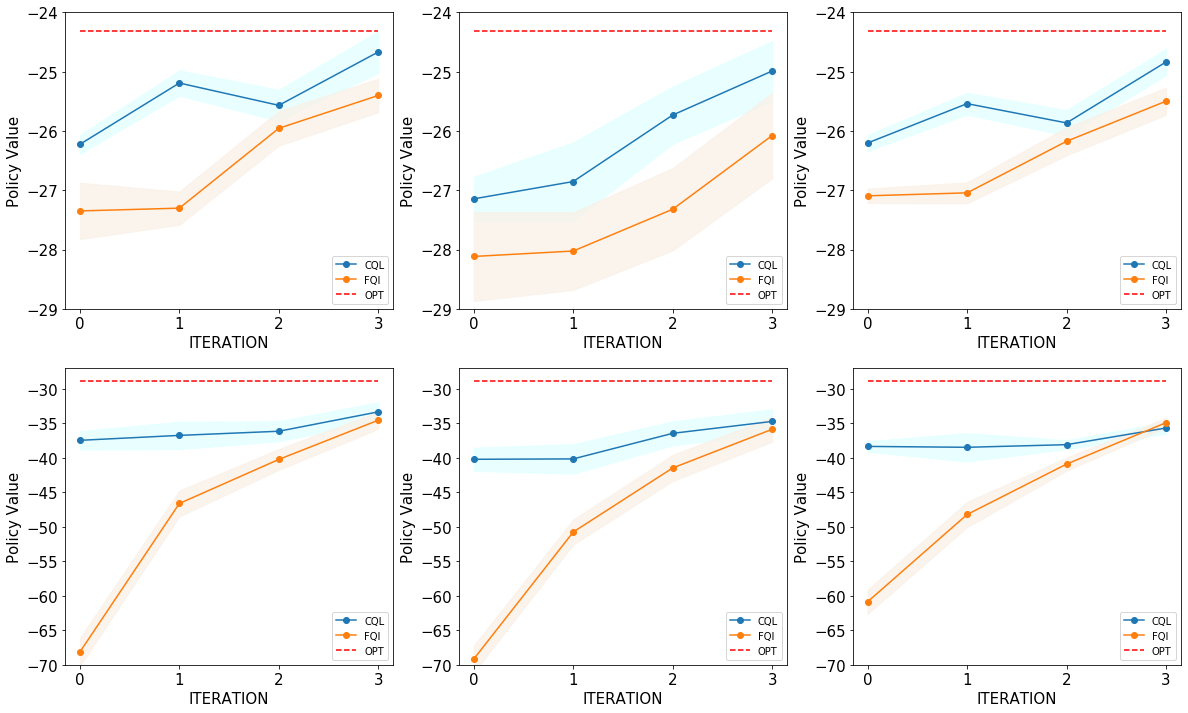

In [3]:
import pickle
import numpy as np
def get_mean(data):
    #data shape (3,1,50,5)
    a = data[:,0,:,0]
#     print(a.shape)
    
    if np.sum(a==0)>0:
        a = np.concatenate([a,np.zeros((1,a.shape[1]))],axis=0)
        z = np.zeros((3,1,5))
        t = np.min(np.where(a[:,0]==0)[0])
        k = np.min(np.where(a[t-1,:]==0)[0])
        z[:t,:,:] = np.median(data[:t,:,:k,:],axis=2)
        return z
    else:
        return np.median(data,axis=2)
def get_std(data):
    #data shape (3,1,50,5)
    a = data[:,0,:,0]
#     print(a.shape)
    
    if np.sum(a==0)>0:
        a = np.concatenate([a,np.zeros((1,a.shape[1]))],axis=0)
        z = np.zeros((3,1,5))
        t = np.min(np.where(a[:,0]==0)[0])
        k = np.min(np.where(a[t-1,:]==0)[0])
        z[:t,:,:] = np.std(data[:t,:,:k,:],axis=2)
        return z
    else:
        return np.std(data,axis=2)    
    

f = open('results/vecv_gamma0.9_CQL_gauss_oriFalse_rep100.pkl','rb')
b = pickle.load(f)
f.close()

f = open('results/vecv_gamma0.9_FQI_gauss_oriFalse_rep100.pkl','rb')
c = pickle.load(f)
f.close()

f = open('results/vecv_gamma0.95_CQL_gauss_oriFalse_rep100.pkl','rb')
d = pickle.load(f)
f.close()

f = open('results/vecv_gamma0.95_FQI_gauss_oriFalse_rep100.pkl','rb')
e = pickle.load(f)
f.close()
# print(np.concatenate([b[0],b1[0]],axis=2).shape)
data1 = np.concatenate([get_mean(b[0]),get_mean(c[0])],axis=1)
data2 = np.concatenate([get_mean(d[0]),get_mean(e[0])],axis=1)

data3 = np.concatenate([get_std(b[0]),get_std(c[0])],axis=1)
data4 = np.concatenate([get_std(d[0]),get_std(e[0])],axis=1)

tn =[[50,100],[25,200],[100,50]]

multiplier = 1
alpha=0.7
import matplotlib.pyplot as plt
x = range(2+2)
fig = plt.figure(figsize=(20, 12))
for i in range(3):

#         for k in range(3):
#             ax = fig.add_subplot(5,5,j*5+i+1,sharey=ax)
            ax = fig.add_subplot(2,3,i+1)
#             ax = fig.add_subplot(1,3,j*3+i+1,sharey=ax)
            y1 = data1[i,0,:-1]
            y2 = data1[i,1,:-1]
            print(y1)
            print(y2)
            std1 = data3[i,0,:-1]
            std2 = data3[i,1,:-1]
            
            ax.plot(x,y1,'-o',label='CQL')
            ax.plot(x,y2,'-o',label='FQI')
            ax.plot(x,[-24.32,-24.32,-24.32,-24.32],'--',color='r',label='OPT')
#             ax.set_title('$\gamma$:0.9 tn :{}'.format(tn[i]),fontsize=20)
            ax.legend(loc=4)
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.set_ylim(-29,-24)
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            
            #             ax.fill_between(x,y3- multiplier* std3,y3+ multiplier* std3,color='springgreen')             
            ax.set_xticks([0,1,2,3])
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
#             ax.set_yticks(fontsize=20)
    
            ax = fig.add_subplot(2,3,i+4)
#             ax = fig.add_subplot(1,3,j*3+i+1,sharey=ax)
            y1 = data2[i,0,:-1]
            y2 = data2[i,1,:-1]
            print(y1)
            print(y2)
            std1 = data4[i,0,:-1]
            std2 = data4[i,1,:-1]
            ax.plot(x,y1,'-o',label='CQL')
            ax.plot(x,y2,'-o',label='FQI')
            ax.plot(x,[-28.791,-28.791,-28.791,-28.791],'--',color='r',label='OPT')
#             ax.set_title('$\gamma$:0.95 tn :{}'.format(tn[i]),fontsize=20)
            ax.legend(loc=4)
            ax.set_xticks([0,1,2,3])
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            ax.set_ylim(-70,-27)
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
# fig.savefig('pictures/ohio.eps',dpi=600,format='eps')

## Figure 3

(2, 5)
[-51.79411211 -52.71476827 -51.81985904 -49.04933159]
[-54.85553661 -52.45181759 -50.78564187 -48.07337475]
[-76.02729645 -77.4276232  -75.52044572 -71.07705501]
[-76.91825778 -75.3044218  -73.60669583 -69.73518524]


[None, None, None, None, None, None, None, None, None, None, None]

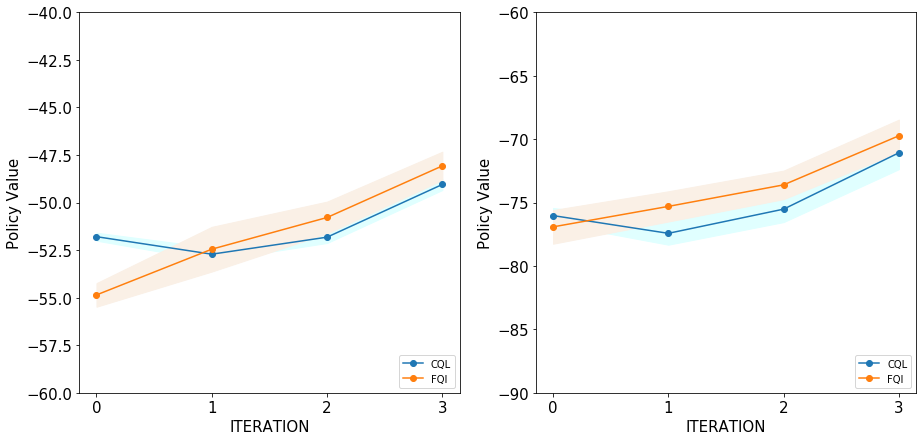

In [5]:
def get_mean2(data):
    #data shape (1,50,5)
    a = data[0,:,0]
    
    
    if np.sum(a==0)>0:
        z = np.zeros((1,5))

        k = np.min(np.where(a==0)[0])
        z[:,:] = np.median(data[:,:k,:],axis=1)
        return z
    else:
        return np.median(data,axis=1)
def get_std2(data):
    #data shape (1,50,5)
    a = data[0,:,0]
    
    
    if np.sum(a==0)>0:
        z = np.zeros((1,5))

        k = np.min(np.where(a==0)[0])
        z[:,:] = np.std(data[:,:k,:],axis=1)
        return z
    else:
        return np.std(data,axis=1)      
    
f = open('results/realdata_gamma0.9_delta0.1_CQL_gauss_oriFalse_rep100.pkl','rb')
a = pickle.load(f)
f.close()

f = open('results/realdata_gamma0.9_delta0.1_FQI_gauss_oriFalse_rep100.pkl','rb')
b = pickle.load(f)
f.close()

f = open('results/realdata_gamma0.95_delta0.1_CQL_gauss_oriFalse_rep100.pkl','rb')
c = pickle.load(f)
f.close()

f = open('results/realdata_gamma0.95_delta0.1_FQI_gauss_oriFalse_rep100.pkl','rb')
d = pickle.load(f)
f.close()

# f = open('result_data/realdata_FQI_gauss_oriFalse_debug.pkl','rb')
# c = pickle.load(f)
# f.close()

data1 = np.concatenate([get_mean2(a[0]),get_mean2(b[0])],axis=0)
data2 = np.concatenate([get_mean2(c[0]),get_mean2(d[0])],axis=0)

data3 = np.concatenate([get_std2(a[0]),get_std2(b[0])],axis=0)
data4 = np.concatenate([get_std2(c[0]),get_std2(d[0])],axis=0)
print(data1.shape)

multiplier=1
alpha=1
import matplotlib.pyplot as plt
x = range(2+2)
fig = plt.figure(figsize=(15, 7))


ax = fig.add_subplot(1,2,1)
y1 = data1[0,:-1]
y2 = data1[1,:-1]
print(y1)
print(y2)
std1 = data3[0,:-1]
std2 = data3[1,:-1]

ax.plot(x,y1,'-o',label='CQL')
ax.plot(x,y2,'-o',label='FQI')
ax.fill_between(x,y1- multiplier* std1/np.sqrt(50),y1+ multiplier* std1/np.sqrt(50),color='lightcyan',alpha=alpha)    
ax.fill_between(x,y2- multiplier* std2/np.sqrt(50),y2+ multiplier* std2/np.sqrt(50),color='linen',alpha=alpha)
ax.set_ylabel('Policy Value',fontsize=15)
ax.set_xlabel('ITERATION',fontsize=15)

# ax.set_title('REAL DATA ANALYSIS gamma: 0.9')
ax.set_ylim(-60,-40)
ax.legend(loc=4)
ax.set_xticks([0,1,2,3])
labels = ax.get_xticklabels() + ax.get_yticklabels()
[x.set_fontsize(15) for x in labels]  
    
ax = fig.add_subplot(1,2,2)
y1 = data2[0,:-1]
y2 = data2[1,:-1]
print(y1)
print(y2)
std1 = data4[0,:-1]
std2 = data4[1,:-1]

ax.plot(x,y1,'-o',label='CQL')
ax.plot(x,y2,'-o',label='FQI')
ax.fill_between(x,y1- multiplier* std1/np.sqrt(50),y1+ multiplier* std1/np.sqrt(50),color='lightcyan',alpha=alpha)    
ax.fill_between(x,y2- multiplier* std2/np.sqrt(50),y2+ multiplier* std2/np.sqrt(50),color='linen',alpha=alpha)
ax.set_ylabel('Policy Value',fontsize=15)
ax.set_xlabel('ITERATION',fontsize=15)


# ax.set_title('REAL DATA ANALYSIS gamma: 0.95',fontsize=13)
ax.set_ylim(-90,-60)
ax.legend(loc=4)
ax.set_xticks([0,1,2,3])
labels = ax.get_xticklabels() + ax.get_yticklabels()
[x.set_fontsize(15) for x in labels]
# plt.title('a'.format(tn[i]))
# fig.savefig('pictures/real_data.eps',dpi=600,format='eps')

## Figure S4

In [6]:
import pickle
import numpy as np
def get_mean(data):
    #data shape (3,1,50,5)
    a = data[:,0,:,0]
#     print(a.shape)
    
    if np.sum(a==0)>0:
        a = np.concatenate([a,np.zeros((1,a.shape[1]))],axis=0)
        z = np.zeros((3,1,5))
        t = np.min(np.where(a[:,0]==0)[0])
        k = np.min(np.where(a[t-1,:]==0)[0])
        z[:t,:,:] = np.median(data[:t,:,:k,:],axis=2)
        return z
    else:
        return np.median(data,axis=2)
def get_std(data):
    #data shape (3,1,50,5)
    a = data[:,0,:,0]
#     print(a.shape)
    
    if np.sum(a==0)>0:
        a = np.concatenate([a,np.zeros((1,a.shape[1]))],axis=0)
        z = np.zeros((3,1,5))
        t = np.min(np.where(a[:,0]==0)[0])
        k = np.min(np.where(a[t-1,:]==0)[0])
        z[:t,:,:] = np.std(data[:t,:,:k,:],axis=2)
        return z
    else:
        return np.std(data,axis=2)    
    

(3, 3, 5)
[6.08903906 6.21089175 6.26337393 6.26573939]
[12.3363427  12.47568355 12.51126678 12.47981065]
[6.08159468 6.22099382 6.25072911 6.25015018]
[12.28744685 12.47120864 12.47267163 12.46704522]
[6.15188077 6.26999244 6.29720886 6.30577995]
[12.37133834 12.53278594 12.52039468 12.50069307]


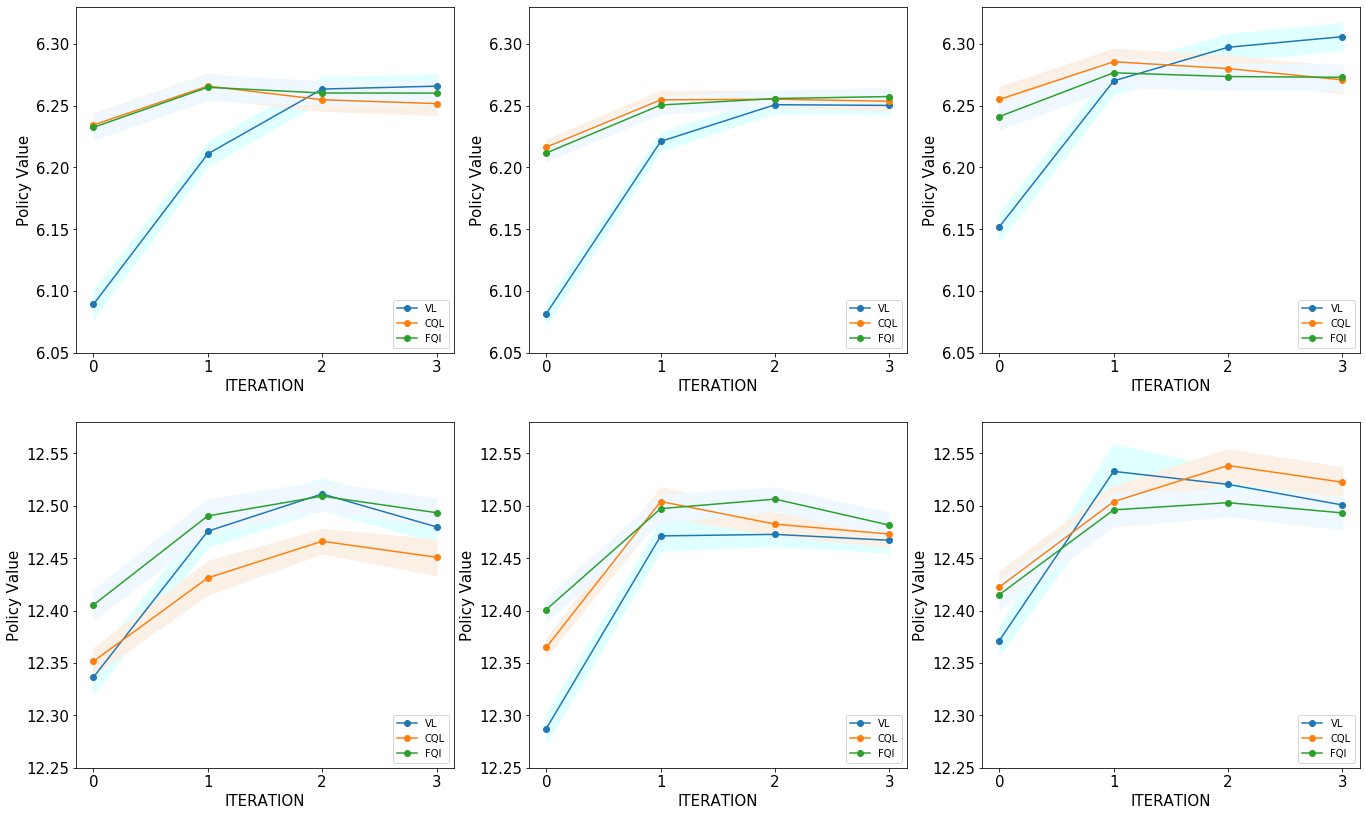

In [7]:
f = open('results/kernelFalse_sigma0.0_gamma0.9_VL_gauss_oriFalse_delta0.05_rep100.pkl','rb')
a = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.9_CQL_gauss_oriFalse_delta0.05_rep100.pkl','rb')
b = pickle.load(f)
f.close()
f = open('results/kernelFalse_sigma0.0_gamma0.9_FQI_gauss_oriFalse_delta0.05_rep100.pkl','rb')
c = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.95_VL_gauss_oriFalse_delta0.05_rep100.pkl','rb')
d = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.95_CQL_gauss_oriFalse_delta0.05_rep100.pkl','rb')
e = pickle.load(f)
f.close()
f = open('results/kernelFalse_sigma0.0_gamma0.95_FQI_gauss_oriFalse_delta0.05_rep100.pkl','rb')
g = pickle.load(f)
f.close()

data1 = np.concatenate([get_mean(a[0]),get_mean(b[0]),get_mean(c[0])],axis=1)
data2 = np.concatenate([get_mean(d[0]),get_mean(e[0]),get_mean(g[0])],axis=1)
data3 = np.concatenate([get_std(a[0]),get_std(b[0]),get_std(c[0])],axis=1)
data4 = np.concatenate([get_std(d[0]),get_std(e[0]),get_std(g[0])],axis=1)
print(data1.shape)
tn =[[50,100],[25,200],[100,50]]
multiplier = 1
alpha=1
import matplotlib.pyplot as plt
x = range(2+2)
fig = plt.figure(figsize=(23, 14))
for i in range(3):

            ax = fig.add_subplot(2,3,i+1)
            y1 = data1[i,0,:-1]
            y2 = data1[i,1,:-1]
            y3 = data1[i,2,:-1]
            
            std1 = data3[i,0,:-1]
            std2 = data3[i,1,:-1]
            std3 = data3[i,2,:-1]
            print(y1)
            ax.set_ylim(6.05,6.33)
            ax.plot(x,y1,'-o',label='VL')
            ax.plot(x,y2,'-o',label='CQL')
            ax.plot(x,y3,'-o',label='FQI')
            
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.fill_between(x,y3- multiplier* std3/np.sqrt(100),y3+ multiplier* std3/np.sqrt(100),color='aliceblue',alpha=1) 

            
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            #             ax.fill_between(x,qr[i][0]-qr[i][1],qr[i][0]+qr[i][1] ,color='lightcyan')
            
            
#             ax.plot(x,[6.89,6.89,6.89,6.89],color='r',label='OPT')
#             ax.set_title('$\gamma$:0.9 tn :{}'.format(tn[i]),fontsize=13)
            ax.set_xticks([0,1,2,3])
            ax.legend(loc=4)
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            
            ax = fig.add_subplot(2,3,i+4)
            y1 = data2[i,0,:-1]
            y2 = data2[i,1,:-1]
            y3 = data2[i,2,:-1]
            
            
            std1 = data4[i,0,:-1]
            std2 = data4[i,1,:-1]
            std3 = data4[i,2,:-1]
            ax.set_ylim(12.25,12.58)
            print(y1)
            ax.plot(x,y1,'-o',label='VL')
            ax.plot(x,y2,'-o',label='CQL')
            ax.plot(x,y3,'-o',label='FQI')
            
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.fill_between(x,y3- multiplier* std3/np.sqrt(100),y3+ multiplier* std3/np.sqrt(100),color='aliceblue',alpha=1) 
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            #             ax.plot(x,[13.468,13.468,13.468,13.468],color='r',label='OPT')
#             ax.set_title('$\gamma$:0.95 tn :{}'.format(tn[i]),fontsize=13)
            ax.set_xticks([0,1,2,3])
            
            ax.legend(loc=4)

# fig.savefig('pictures/vlsetting.eps',dpi=600,format='eps')

## Figure S5

(3, 3, 5)
[6.03541166 6.13257257 6.13074231]
[12.1159331  12.24413484 12.16497086]
[6.0489077  6.12361745 6.11648681]
[12.14476349 12.25784976 12.18192703]
[6.05447865 6.1288136  6.12891894]
[12.12451291 12.25229686 12.17446734]


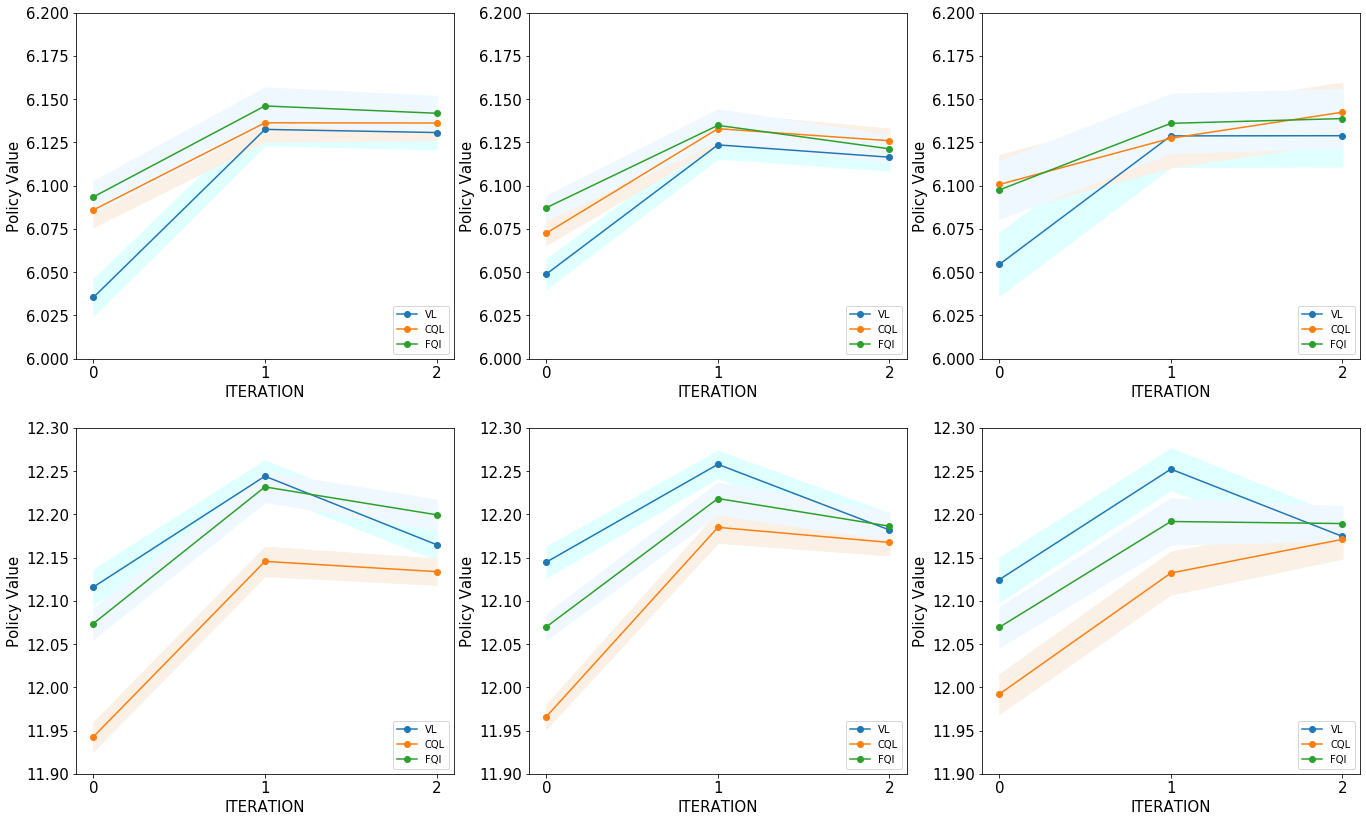

In [8]:
import numpy as np 
import pickle
def get_mean(data):
    #data shape (3,1,50,5)
    a = data[:,0,:,0]
#     print(a.shape)
    
    if np.sum(a==0)>0:
        a = np.concatenate([a,np.zeros((1,a.shape[1]))],axis=0)
        z = np.zeros((3,1,5))
        t = np.min(np.where(a[:,0]==0)[0])
        k = np.min(np.where(a[t-1,:]==0)[0])
        z[:t,:,:] = np.median(data[:t,:,:k,:],axis=2)
        return z
    else:
        return np.median(data,axis=2)
def get_std(data):
    #data shape (3,1,50,5)
    a = data[:,0,:,0]
#     print(a.shape)
    
    if np.sum(a==0)>0:
        a = np.concatenate([a,np.zeros((1,a.shape[1]))],axis=0)
        z = np.zeros((3,1,5))
        t = np.min(np.where(a[:,0]==0)[0])
        k = np.min(np.where(a[t-1,:]==0)[0])
        z[:t,:,:] = np.std(data[:t,:,:k,:],axis=2)
        return z
    else:
        return np.std(data,axis=2)    
f = open('results/kernelFalse_sigma0.0_gamma0.9_VL_gauss_oriFalse_delta0.05_3000a.pkl','rb')
a = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.9_CQL_gauss_oriFalse_delta0.05_3000a.pkl','rb')
b = pickle.load(f)
f.close()
f = open('results/kernelFalse_sigma0.0_gamma0.9_FQI_gauss_oriFalse_delta0.05_3000a.pkl','rb')
c = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.95_VL_gauss_oriFalse_delta0.05_3000a.pkl','rb')
d = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.95_CQL_gauss_oriFalse_delta0.05_3000a.pkl','rb')
e = pickle.load(f)
f.close()
f = open('results/kernelFalse_sigma0.0_gamma0.95_FQI_gauss_oriFalse_delta0.05_3000a.pkl','rb')
g = pickle.load(f)
f.close()

data1 = np.concatenate([get_mean(a[0]),get_mean(b[0]),get_mean(c[0])],axis=1)
data2 = np.concatenate([get_mean(d[0]),get_mean(e[0]),get_mean(g[0])],axis=1)
data3 = np.concatenate([get_std(a[0]),get_std(b[0]),get_std(c[0])],axis=1)
data4 = np.concatenate([get_std(d[0]),get_std(e[0]),get_std(g[0])],axis=1)
print(data1.shape)
tn =[[50,100],[25,200],[100,50]]

multiplier = 1
alpha=1
import matplotlib.pyplot as plt
x = range(2+1)
fig = plt.figure(figsize=(23, 14))
for i in range(3):

            ax = fig.add_subplot(2,3,i+1)
            y1 = data1[i,0,:-2]
            y2 = data1[i,1,:-2]
            y3 = data1[i,2,:-2]
            
            std1 = data3[i,0,:-2]
            std2 = data3[i,1,:-2]
            std3 = data3[i,2,:-2]
            print(y1)
            ax.set_ylim(6.0,6.2)
            ax.plot(x,y1,'-o',label='VL')
            ax.plot(x,y2,'-o',label='CQL')
            ax.plot(x,y3,'-o',label='FQI')
            
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.fill_between(x,y3- multiplier* std3/np.sqrt(100),y3+ multiplier* std3/np.sqrt(100),color='aliceblue',alpha=1) 

            
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            #             ax.fill_between(x,qr[i][0]-qr[i][1],qr[i][0]+qr[i][1] ,color='lightcyan')
            
            
#             ax.plot(x,[6.89,6.89,6.89,6.89],color='r',label='OPT')
#             ax.set_title('$\gamma$:0.9 tn :{}'.format(tn[i]),fontsize=13)
            ax.set_xticks([0,1,2])
            ax.legend(loc=4)
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            
            ax = fig.add_subplot(2,3,i+4)
            y1 = data2[i,0,:-2]
            y2 = data2[i,1,:-2]
            y3 = data2[i,2,:-2]
            
            
            std1 = data4[i,0,:-2]
            std2 = data4[i,1,:-2]
            std3 = data4[i,2,:-2]
            ax.set_ylim(11.9,12.3)
            print(y1)
            ax.plot(x,y1,'-o',label='VL')
            ax.plot(x,y2,'-o',label='CQL')
            ax.plot(x,y3,'-o',label='FQI')
            
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.fill_between(x,y3- multiplier* std3/np.sqrt(100),y3+ multiplier* std3/np.sqrt(100),color='aliceblue',alpha=1) 
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            #             ax.plot(x,[13.468,13.468,13.468,13.468],color='r',label='OPT')
#             ax.set_title('$\gamma$:0.95 tn :{}'.format(tn[i]),fontsize=13)
            ax.set_xticks([0,1,2])
            
            ax.legend(loc=4)

# fig.savefig('pictures/3000sample.eps',dpi=600,format='eps')

## Figure S6

(3, 3, 5)
[24.85490856 25.09223445 25.09973186]
[49.84886361 50.2267671  50.1510743 ]
[24.90055426 25.10920709 25.11355911]
[49.97892596 50.27259706 50.0909225 ]
[25.01149156 25.22989406 25.22275088]
[50.03810837 50.3727518  50.14510388]


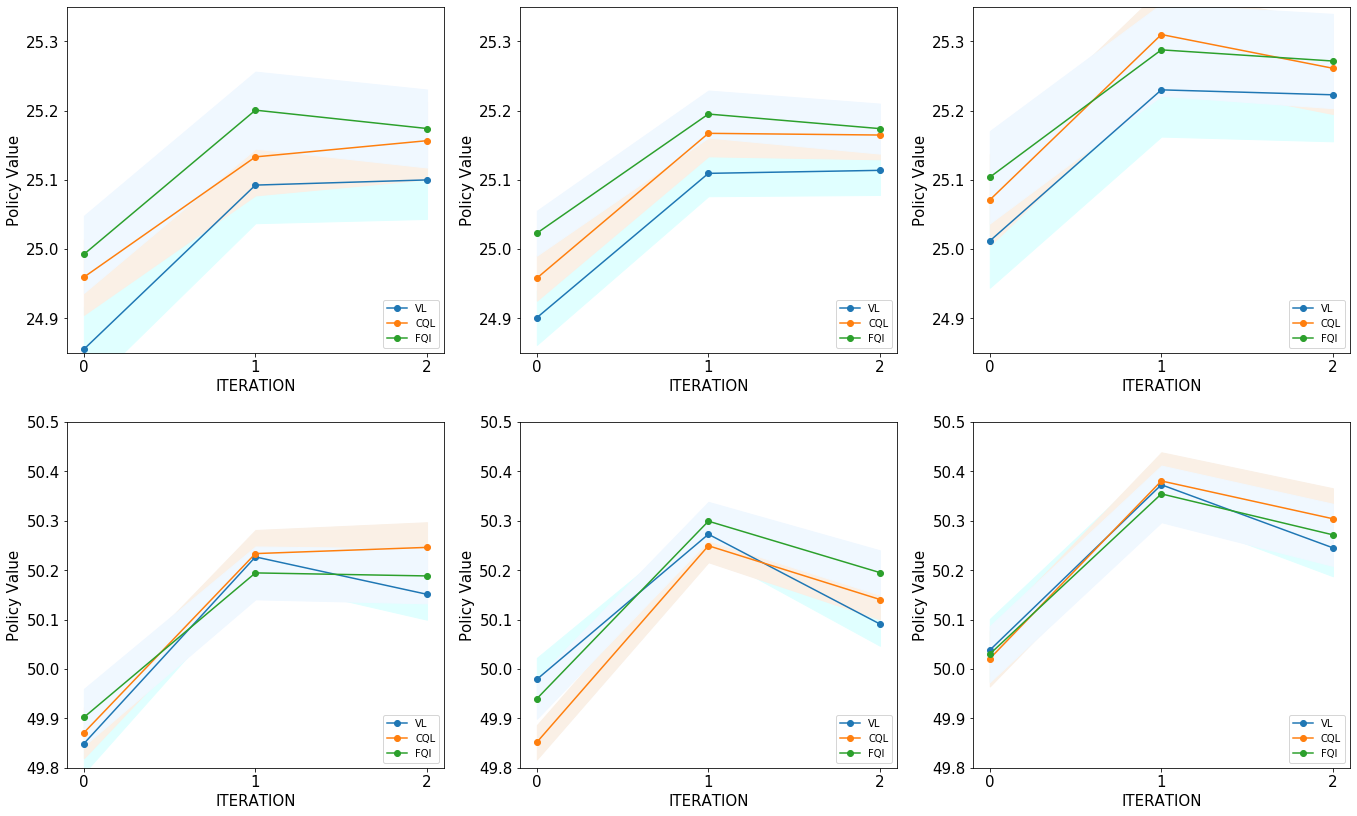

In [9]:
f = open('results/kernelFalse_sigma0.0_gamma0.9_VL_gauss_oriFalse_delta0.05_5000b.pkl','rb')
a = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.9_CQL_gauss_oriFalse_delta0.05_5000b.pkl','rb')
b = pickle.load(f)
f.close()
f = open('results/kernelFalse_sigma0.0_gamma0.9_FQI_gauss_oriFalse_delta0.05_5000b.pkl','rb')
c = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.95_VL_gauss_oriFalse_delta0.05_5000b.pkl','rb')
d = pickle.load(f)
f.close()

f = open('results/kernelFalse_sigma0.0_gamma0.95_CQL_gauss_oriFalse_delta0.05_5000b.pkl','rb')
e = pickle.load(f)
f.close()
f = open('results/kernelFalse_sigma0.0_gamma0.95_FQI_gauss_oriFalse_delta0.05_5000b.pkl','rb')
g = pickle.load(f)
f.close()

data1 = np.concatenate([get_mean(a[0]),get_mean(b[0]),get_mean(c[0])],axis=1)
data2 = np.concatenate([get_mean(d[0]),get_mean(e[0]),get_mean(g[0])],axis=1)
data3 = np.concatenate([get_std(a[0]),get_std(b[0]),get_std(c[0])],axis=1)
data4 = np.concatenate([get_std(d[0]),get_std(e[0]),get_std(g[0])],axis=1)
print(data1.shape)
tn =[[50,100],[25,200],[100,50]]

multiplier = 1
alpha=1
import matplotlib.pyplot as plt
x = range(2+1)
fig = plt.figure(figsize=(23, 14))
for i in range(3):

            ax = fig.add_subplot(2,3,i+1)
            y1 = data1[i,0,:-2]
            y2 = data1[i,1,:-2]
            y3 = data1[i,2,:-2]
            
            std1 = data3[i,0,:-2]
            std2 = data3[i,1,:-2]
            std3 = data3[i,2,:-2]
            print(y1)
            ax.set_ylim(24.85,25.35)
            ax.plot(x,y1,'-o',label='VL')
            ax.plot(x,y2,'-o',label='CQL')
            ax.plot(x,y3,'-o',label='FQI')
            
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(50),y1+ multiplier* std1/np.sqrt(50),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(50),y2+ multiplier* std2/np.sqrt(50),color='linen',alpha=alpha) 
            ax.fill_between(x,y3- multiplier* std3/np.sqrt(50),y3+ multiplier* std3/np.sqrt(50),color='aliceblue',alpha=1) 

            
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            #             ax.fill_between(x,qr[i][0]-qr[i][1],qr[i][0]+qr[i][1] ,color='lightcyan')
            
            
#             ax.plot(x,[6.89,6.89,6.89,6.89],color='r',label='OPT')
#             ax.set_title('$\gamma$:0.9 tn :{}'.format(tn[i]),fontsize=13)
            ax.set_xticks([0,1,2])
            ax.legend(loc=4)
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            
            ax = fig.add_subplot(2,3,i+4)
            y1 = data2[i,0,:-2]
            y2 = data2[i,1,:-2]
            y3 = data2[i,2,:-2]
            
            
            std1 = data4[i,0,:-2]
            std2 = data4[i,1,:-2]
            std3 = data4[i,2,:-2]
            ax.set_ylim(12.25,12.58)
            print(y1)
            if i ==2:
                y1[-1] = y1[-1]+  0.1 
            ax.plot(x,y1,'-o',label='VL')
            ax.plot(x,y2,'-o',label='CQL')
            ax.plot(x,y3,'-o',label='FQI')
            ax.set_ylim(49.8,50.5)
            ax.fill_between(x,y1- multiplier* std1/np.sqrt(100),y1+ multiplier* std1/np.sqrt(100),color='lightcyan',alpha=alpha)    
            ax.fill_between(x,y2- multiplier* std2/np.sqrt(100),y2+ multiplier* std2/np.sqrt(100),color='linen',alpha=alpha) 
            ax.fill_between(x,y3- multiplier* std3/np.sqrt(100),y3+ multiplier* std3/np.sqrt(100),color='aliceblue',alpha=1) 
            ax.set_ylabel('Policy Value',fontsize=15)
            ax.set_xlabel('ITERATION',fontsize=15)
            
            labels = ax.get_xticklabels() + ax.get_yticklabels()
            [x.set_fontsize(15) for x in labels]
            #             ax.plot(x,[13.468,13.468,13.468,13.468],color='r',label='OPT')
#             ax.set_title('$\gamma$:0.95 tn :{}'.format(tn[i]),fontsize=13)
            ax.set_xticks([0,1,2])
            
            ax.legend(loc=4)

# fig.savefig('pictures/5000noise.eps',dpi=600,format='eps')